## Setup

Para reproduzir os código de exemplo desse notebook assume-se Python versão 3.6 e é necessária a instalação das seguintes bibliotecas:

```
pip3 install matplotlib scikit-learn
pip3 install numpy
pip3 install pandas
```

A base Titanic pode ser baixada [aqui](https://www.kaggle.com/c/titanic), ela possui 3 arquivos (train.csv, test.csv e gender_submission.csv). Apenas o arquivo train.csv é usado e deve estar no mesmo diretório que esse código.

# Scikit-Learn

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/320px-Scikit_learn_logo_small.svg.png)




O [scikit-learn](https://scikit-learn.org/stable/) é uma das bibliotecas mais utilizadas para aplicações de aprendizagem de máquina. 

Nela existem implementados vários algoritmos para problemas de classificação, regressão, clusterização, pré-processamento, validação de modelos e etc.

Aqui apresentaremos alguns conceitos e aplicações interessantes para se utilizar com essa biblioteca.


## Como utilizar?

Os métodos básicos dessa biblioteca são o 'fit' e o 'predict'.

* Fit

  O método fit deve receber como argumentos de entrada a matriz de atributos dos casos de treinamento e o vetor de valores alvo. 

  Na matriz de atributos, cada coluna representa um atributo e cada linha é um exemplo de treinamento. Já o vetor de valores alvo deve ter o tamanho igual ao número de linhas da matriz e cada elemento deverá representar uma label, no caso de classificação, ou um valor numérico no caso da regressão.


  ![alt text](https://drive.google.com/uc?id=1ngGQh_QUe7y1_7PFVA3w7fTkWPElxj82)


* Predict

O método predict é utilizado quando o modelo já foi treinado. Ele recebe a matriz de atributos dos casos de teste e retorna o vetor de predição para cada teste.


## Classificação

Os problemas de classificação são muito comuns em aprendizado de máquina. Nesses problemas, cada exemplo deve pertencer a um grupo ou classe.

![alt text](https://pythonmachinelearning.pro/wp-content/uploads/2017/10/SVM-Perceptron-Decision-Boundary.png.webp)

A biblioteca scikit-learn possui vários algoritmos de classificação e a escolha do melhor algoritmo também faz parte do projeto. 

### Algoritmos de classificação

Alguns (existem vários outros) algoritmos de classificação implementados pelo Scikit-Learn são:

* [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html?highlight=adaboost#sklearn.ensemble.AdaBoostClassifier)


* [ComplementNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html?highlight=complementnb#sklearn.naive_bayes.ComplementNB)


* [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier)


* [LabelPropagation](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html?highlight=labelpropagation#sklearn.semi_supervised.LabelPropagation)


* [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=svc#sklearn.svm.LinearSVC)


* [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html?highlight=logisticregressioncv#sklearn.linear_model.LogisticRegressionCV)


* [MultiOutputClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputClassifier.html?highlight=multioutputclassifier#sklearn.multioutput.MultiOutputClassifier)


* [OutputCodeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OutputCodeClassifier.html#sklearn.multiclass.OutputCodeClassifier)


* [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)


* [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforestclassifier#sklearn.ensemble.RandomForestClassifier)


* [StackingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier)


* [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)


* [VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier)

Cada um tem a sua metodologia e deve ser aplicado para um determinado tipo de problema. O estudo de cada caso e da formulação matemática de cada classificador é muito importante na hora de resolver o seu problema. 





### Exemplo: base Titanic  



A base Titanic é uma famosa base de dados da comunidade Kaggle. Ela possui informações dos passageiros do naugrágio do famoso navio Titanic e o objetivo é predizer se os passageiros morreram ou sobreviveram ao acidente.

In [0]:
# Imports
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [24]:
# Lê o arquivo de treinamento 
df_titanic = pd.read_csv("train.csv")
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Alguns atributos não são importantes para a classificação, como nome e id do passageiros, outros como a cabine possuem muitos dados faltantes. Assim esses tributos serão removidos da base de dados.

In [0]:
# Remove do dataframe atributos que não possuem significado para o treinamento
df_titanic.drop(["Name", "Cabin", "PassengerId", "Ticket"], axis=1, inplace=True)

In [26]:
print("Survived=", df_titanic.Survived.unique())
print("Pclass =", df_titanic.Pclass.unique())
print("Sex =", df_titanic.Sex.unique())
print("SibSp =", df_titanic.SibSp.unique())
print("Parch =" ,df_titanic.Parch.unique())
print("Embarked =", df_titanic.Embarked.unique())
print("Age mean =", df_titanic.Age.mean())

Survived= [0 1]
Pclass = [3 1 2]
Sex = ['male' 'female']
SibSp = [1 0 3 4 2 5 8]
Parch = [0 1 2 5 3 4 6]
Embarked = ['S' 'C' 'Q' nan]
Age mean = 29.69911764705882


Há valores faltantes (NaN) nos atributos Age e Embarked. No atributo Embarked, os exemplos que não possuem esse atributo serão removidos, já que são poucos. Já os exemplos que não possuem o atributo idade, terão sua idade completada com valor 30 que é a idade média dos passageiros. 

Os dados categóricos forma transformados em numéricos usando a função [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [27]:
# Substitui os valores NaN no atributo idade pela média das idades
df_titanic.Age.fillna(df_titanic.Age.mean(), inplace=True)

# Retira os exemplos que não possuem informação de Embarked
df_titanic = df_titanic[df_titanic.Embarked == df_titanic.Embarked]

# Transforma os atributos categóricos em numéricos
df_titanic = pd.get_dummies(df_titanic)

df_titanic

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


In [0]:
# Dividindo os exemplos entre treinamento e validação
df_test  = df_titanic.sample(100)
df_train = df_titanic.drop(df_test.index)

In [0]:
# Rótulos dos exemplos de treinamento
y_train = df_train['Survived']
# Exemplos de treinamento com seus atributos e sem os rótulos
X_train = df_train.drop('Survived',axis=1)

Serão usados dois classificadores diferentes a fim de comparar os resultados, contudo, a forma de usá-los é bastante parecida, mudando apenas alguns parâmetros ao instanciá-los.

In [30]:
# Instanciando os classificadores
clf_random = RandomForestClassifier(max_depth=2, random_state=0, n_jobs=-1)
clf_svm = svm.SVC()

# Fazendo o treinamento
clf_random.fit(X_train, y_train)
clf_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
# Fazendo predição
X_test = df_test.drop('Survived',axis=1)
y_pred_random = clf_random.predict(X_test)
y_pred_svm = clf_svm.predict(X_test)

In [32]:
# Avaliando o método
from sklearn.metrics import accuracy_score

y_test = df_test['Survived']
print('Acurácia do classificador Random Forest: ', accuracy_score(y_test,y_pred_random))
print('Acurácia do classificador SVC: ', accuracy_score(y_test,y_pred_svm))

Acurácia do classificador Random Forest:  0.82
Acurácia do classificador SVC:  0.7


## Regressão


Os problemas de regressão acontecem quando a saída do seu sistema é uma variável contínua. Como uma medição, por exemplo.

![alt text](https://backlog.com/wp-blog-app/uploads/2019/12/Nulab-Gradient-descent-for-linear-regression-using-Golang-Blog.png)

### Algoritmos de regressão 

Alguns algoritmos de classificação implementados pelo scikit-learn são:

* [BaggingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html?highlight=baggingregressor#sklearn.ensemble.BaggingRegressor)


* [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decisiontreeregressor#sklearn.tree.DecisionTreeRegressor)


* [GaussianProcessRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html?highlight=gaussianprocessregressor#sklearn.gaussian_process.GaussianProcessRegressor)


* [HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html?highlight=huberregressor#sklearn.linear_model.HuberRegressor)


* [IsotonicRegression](https://scikit-learn.org/stable/modules/generated/sklearn.isotonic.IsotonicRegression.html?highlight=isotonicregression#sklearn.isotonic.IsotonicRegression)


* [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linearregression#sklearn.linear_model.LinearRegression)


* [MultiOutputRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.multioutput.MultiOutputRegressor.html?highlight=multioutputregressor#sklearn.multioutput.MultiOutputRegressor)


* [NuSVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVR.html?highlight=svr#sklearn.svm.NuSVR)


* [RANSACRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html?highlight=ransacregressor#sklearn.linear_model.RANSACRegressor)


* [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html?highlight=sgdregressor#sklearn.linear_model.SGDRegressor)


* [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?highlight=svr#sklearn.svm.SVR)


* [TheilSenRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html?highlight=theilsenregressor#sklearn.linear_model.TheilSenRegressor)










### Exemplo

Vamos analisar um algoritmo de regressão para estimar uma função seno.

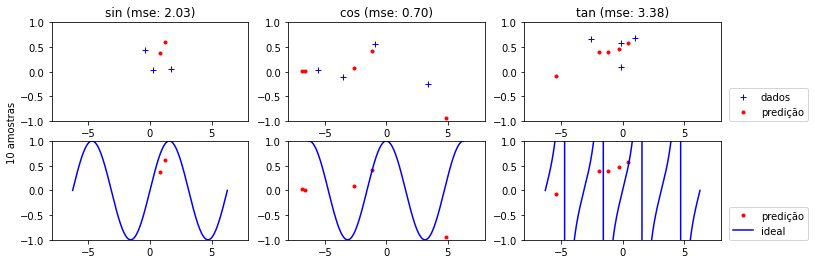

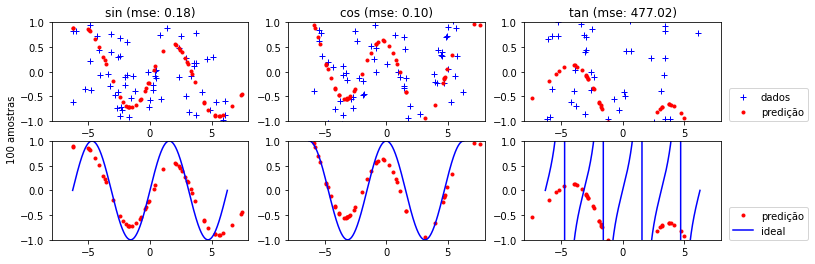

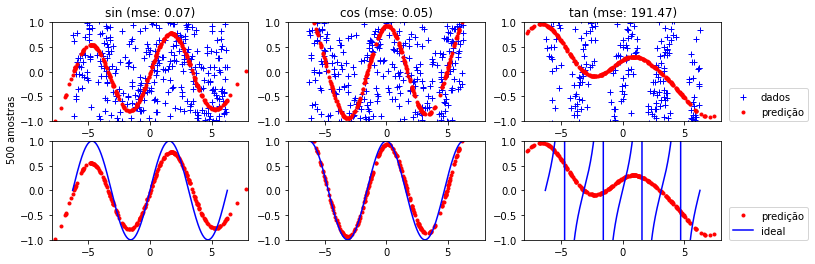

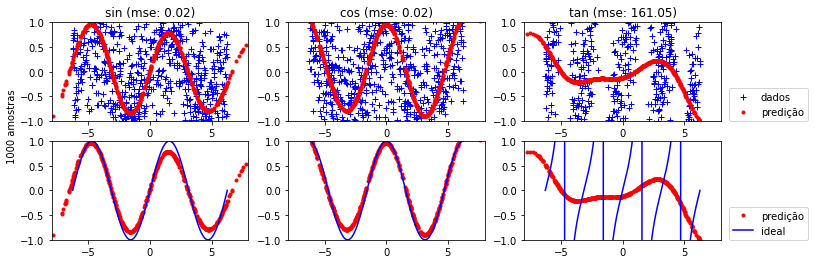

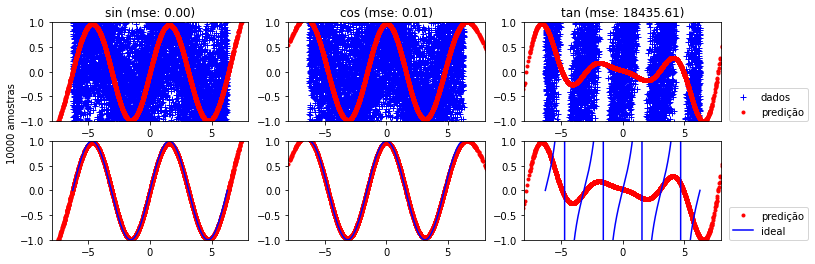

In [33]:
# Imports
from pandas import DataFrame as DF
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt

np.random.seed(42)

def ruido(size):
    return np.random.normal(size=size)

# Número de amostras de cada teste
num_samples = [10, 100, 500, 1000, 10000]

# Funções a serem estimadas
functions = [np.sin, np.cos, np.tan]

# Cria vetor de limite [-2pi,2pi] com 10000 amostras
X = np.linspace(-2 * np.pi, 2 * np.pi, num=num_samples[-1])

# Aplica as funções para todos os elementos de X
y = [f(X) for f in functions]
        
ncols = len(functions)
plt_width = 4 # inches

# Instancia um regressor
clf = svm.SVR() 


for samples in num_samples:
    plt.figure(figsize=(ncols * plt_width, plt_width))

    for index in range(ncols):
        f = functions[index]
        
        train_X = np.random.choice(X, size=samples, replace=False)
        # Dados reais normalmente possuem ruído
        train_y = f(train_X) + ruido(samples) 
        test_X = DF(np.random.choice(X, size=(samples // 2), replace=False) + ruido(samples // 2))   
        
        # Treina regressor com dados de treinamento
        clf.fit(DF(train_X), train_y)

        # Prediz exmplos de teste
        prediction = clf.predict(test_X)
        
        # Calcula o erro quadrático médio 
        mse = metrics.mean_squared_error(prediction, f(test_X))
        
        # Plota os gráficos
        data_plt = plt.subplot(2, ncols, index + 1, title=f'{f.__name__} (mse: {mse:.2f})')
        plt.xlim(-8, 8)
        plt.ylim(-1, 1)
        plt.plot(train_X, train_y, 'b+', label='dados')
        plt.plot(test_X, prediction, 'r.', label='predição')

        ideal_plt = plt.subplot(2, ncols, index + ncols + 1)
        plt.xlim(-8, 8)
        plt.ylim(-1, 1)
        plt.plot(test_X, prediction, 'r.', label='predição')
        plt.plot(X, y[index], 'b', label='ideal')
    
    data_plt.legend(loc=(1.04,0))
    ideal_plt.legend(loc=(1.04,0))
    ideal_plt.text(-50, .6, f'{samples} amostras', rotation='vertical')

    plt.show()

## Outros Recursos

* [Machine Learning in Python](https://www.springboard.com/resources/learning-paths/machine-learning-python/)
* [Scikit-learn Documentation](https://scikit-learn.org/stable/)
* [Pandas Documentation](https://pandas.pydata.org/docs/)

